# Portfolio Part 4 - Analysis Electric vehicle population data (2024 S1)

This Portfolio task will determine a new dataset named 'Electric_Vehicle_Population_Data'.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|VIN (1-10)|The first 10 characters of the Vehicle Identification Number, which uniquely identifies each vehicle|
|County|The county where the vehicle is registered|
|City|The city where the vehicle is registered|
|State|The state where the vehicle is registered|
|Postal Code|The postal code (ZIP code) where the vehicle is registered|
|Model Year|The year the vehicle was manufactured|
|Make|The brand or manufacturer of the vehicle|
|Model|The specific model name or designation of the vehicle|
|Electric Vehicle Type| The type of electric vehicle, such as battery electric vehicles (BEV) or plug-in hybrid electric vehicles (PHEV)|
|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Indicates whether the vehicle is eligible for Clean Alternative Fuel Vehicle (CAFV) incentives or benefits|
|Electric Range|The estimated range of the vehicle on a single charge|
|Base MSRP|The Manufacturer's Suggested Retail Price of the vehicle without additional features|
|Legislative District|The legislative district associated with the vehicle's registration location|
|DOL Vehicle ID|An identification number assigned by the Department of Licensing for the vehicle|
|Vehicle Location|Additional information about the vehicle's location|
|Electric Utility|The electric utility company serving the area where the vehicle is registered|
|2020 Census Tract|The census tract associated with the vehicle's registration location|



In this notebook is to build and evaluate predictive models for 'DEATH_EVENT' from other available features. More specifically,**completed these following major steps**:

1.Data Exploration and Cleaning: We'll begin by exploring the Electric_Vehicle_Population_Data to understand its structure, variables, and any potential issues such as missing values or inconsistencies. We'll clean the data by handling missing values and ensuring data quality.

2.Feature Selection and Engineering: We'll identify relevant features that may impact electric vehicle adoption and explore opportunities for feature engineering if necessary. This step will involve selecting variables such as vehicle type, electric range, make, model, and other relevant factors.

3.Correlation Analysis: We'll examine the relationships between different variables in the Electric_Vehicle_Population_Data to uncover any patterns or dependencies. This analysis will help us understand which factors are most influential in predicting electric vehicle adoption.

4.Predictive Modeling: We'll build predictive models to forecast electric vehicle adoption rates or other relevant outcomes. This may include techniques such as regression analysis, classification algorithms, or clustering to identify distinct groups of electric vehicle owners.

5.Model Evaluation: We'll evaluate the performance of our predictive models using appropriate evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared for regression problems, and accuracy, F1-score, or Area Under the ROC Curve (AUC) for classification problems.

Objective: Our goal is to analyze the Electric_Vehicle_Population_Data and develop predictive models to understand factors influencing electric vehicle adoption rates and trends.

Electric_Vehicle_Population_Data Overview:

The Electric_Vehicle_Population_Data contains information about electric vehicle registrations, including details such as VIN (Vehicle Identification Number), county, city, state, model year, make, model, electric vehicle type, eligibility for incentives, electric range, base MSRP, legislative district, vehicle location, electric utility, and 2020 Census Tract.

This dataset provides valuable insights into the electric vehicle population, including its distribution across different regions, trends over time, and factors influencing adoption rates.

Dataset Overview:

Medical records of 299 heart failure patients collected at Faisalabad Institute of Cardiology and Allied Hospital in Faisalabad, Punjab, Pakistan, during April–December 2015.
Patients had left ventricular systolic dysfunction and were classified as NYHA classes III or IV.
Consisted of 105 women and 194 men, aged between 40 and 95 years old.

In [8]:
# Codes to use
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [9]:
ds = 'Electric_Vehicle_Population_Data.csv' 

In [10]:
#.1 data load
df = pd.read_csv(ds)
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [11]:
X = df.drop(['DOL Vehicle ID'], axis=1)
y = df['DOL Vehicle ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
df = df.dropna()

In [13]:
# checking dataframe shape
df.shape

(181055, 17)

In [14]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [15]:
# checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181055 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181055 non-null  object 
 1   County                                             181055 non-null  object 
 2   City                                               181055 non-null  object 
 3   State                                              181055 non-null  object 
 4   Postal Code                                        181055 non-null  float64
 5   Model Year                                         181055 non-null  int64  
 6   Make                                               181055 non-null  object 
 7   Model                                              181055 non-null  object 
 8   Electric Vehicle Type                              181055 non-null  object 
 9 

In [16]:
# Statistical description of dataset
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,181055.000000,181055.000000,181055.000000,181055.000000,181055.000000,1.810550e+05,1.810550e+05
mean,98260.619331,2020.583342,57.809969,1038.141173,29.107183,2.214370e+08,5.303982e+10
std,303.618629,2.991069,91.387237,8220.159471,14.892453,7.528927e+07,1.621873e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.830801e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.290973e+08,5.303303e+10
75%,98371.000000,2023.000000,75.000000,0.000000,42.000000,2.561379e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [17]:
pd.isnull(df)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181454,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181455,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#. Clean data 
clean_df = df.dropna()
clean_df.shape

(181055, 17)

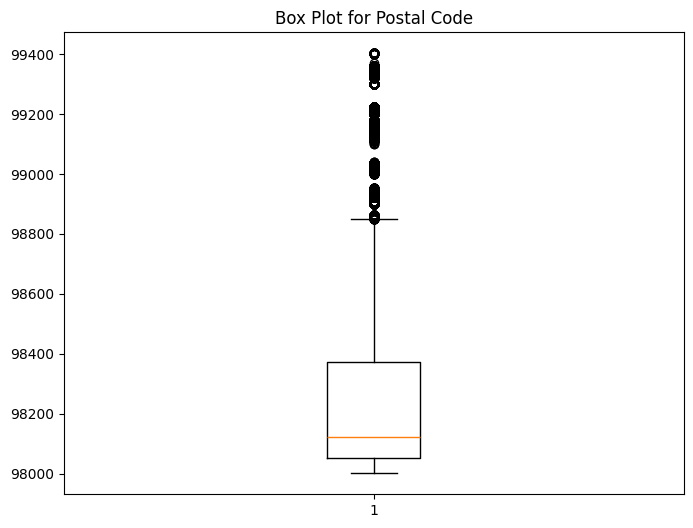

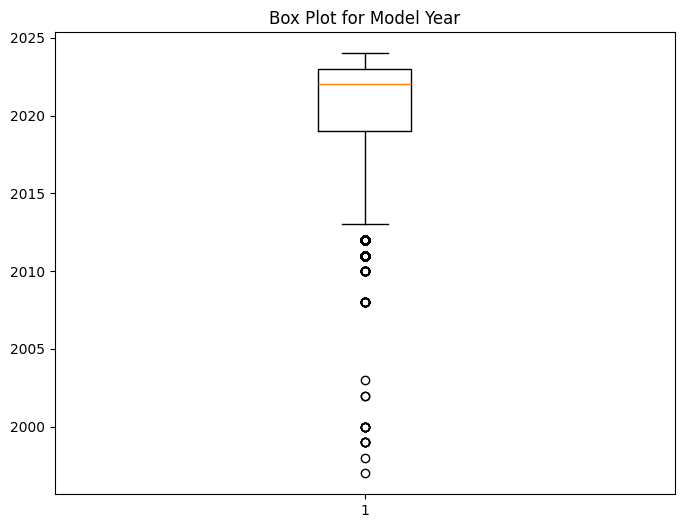

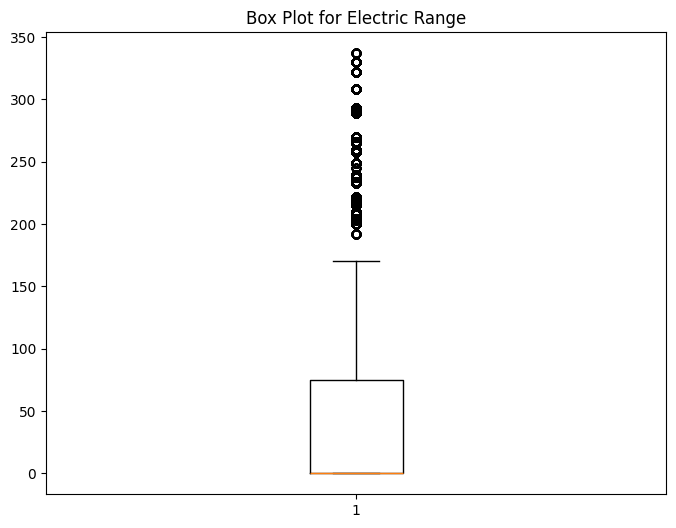

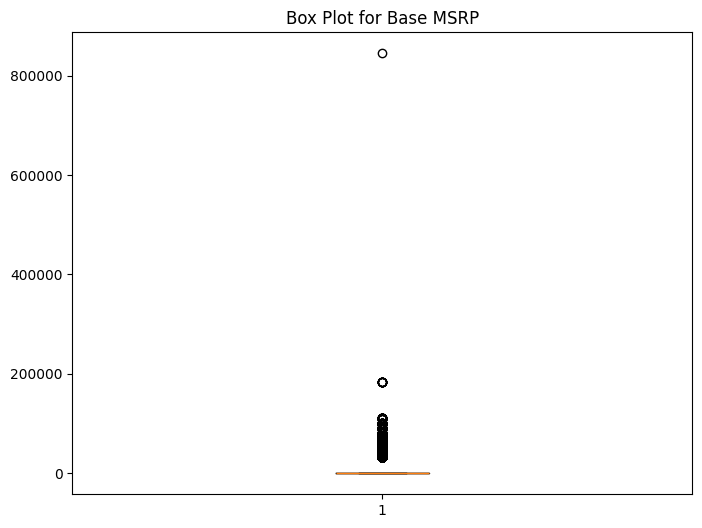

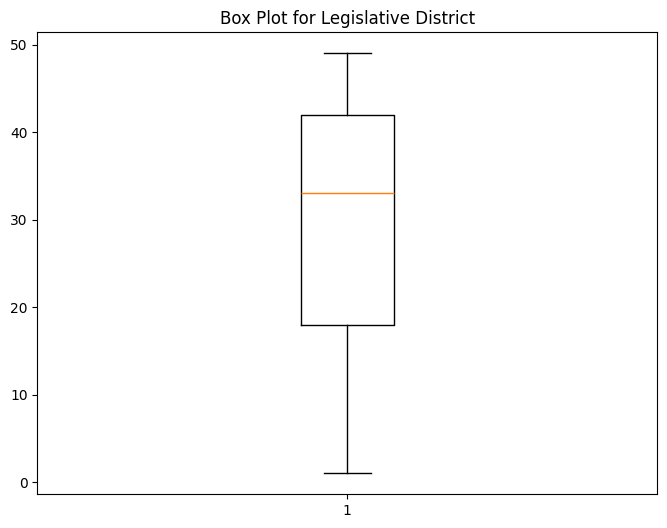

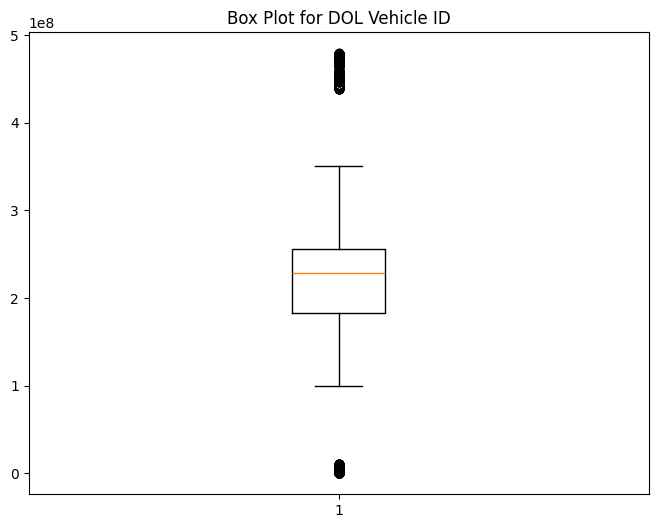

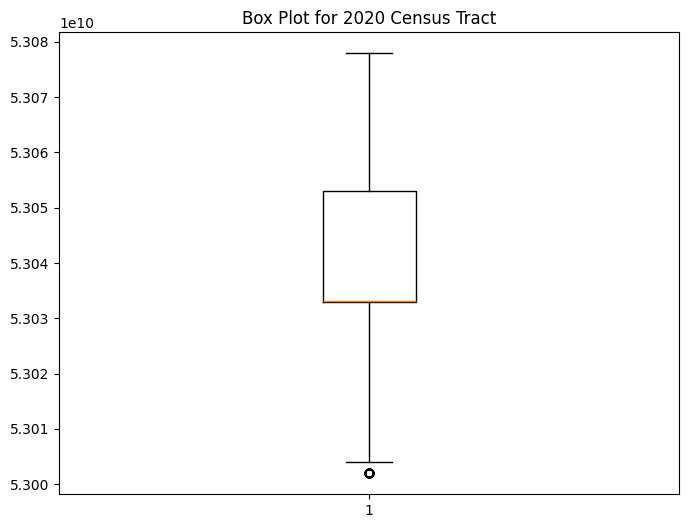

In [19]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()

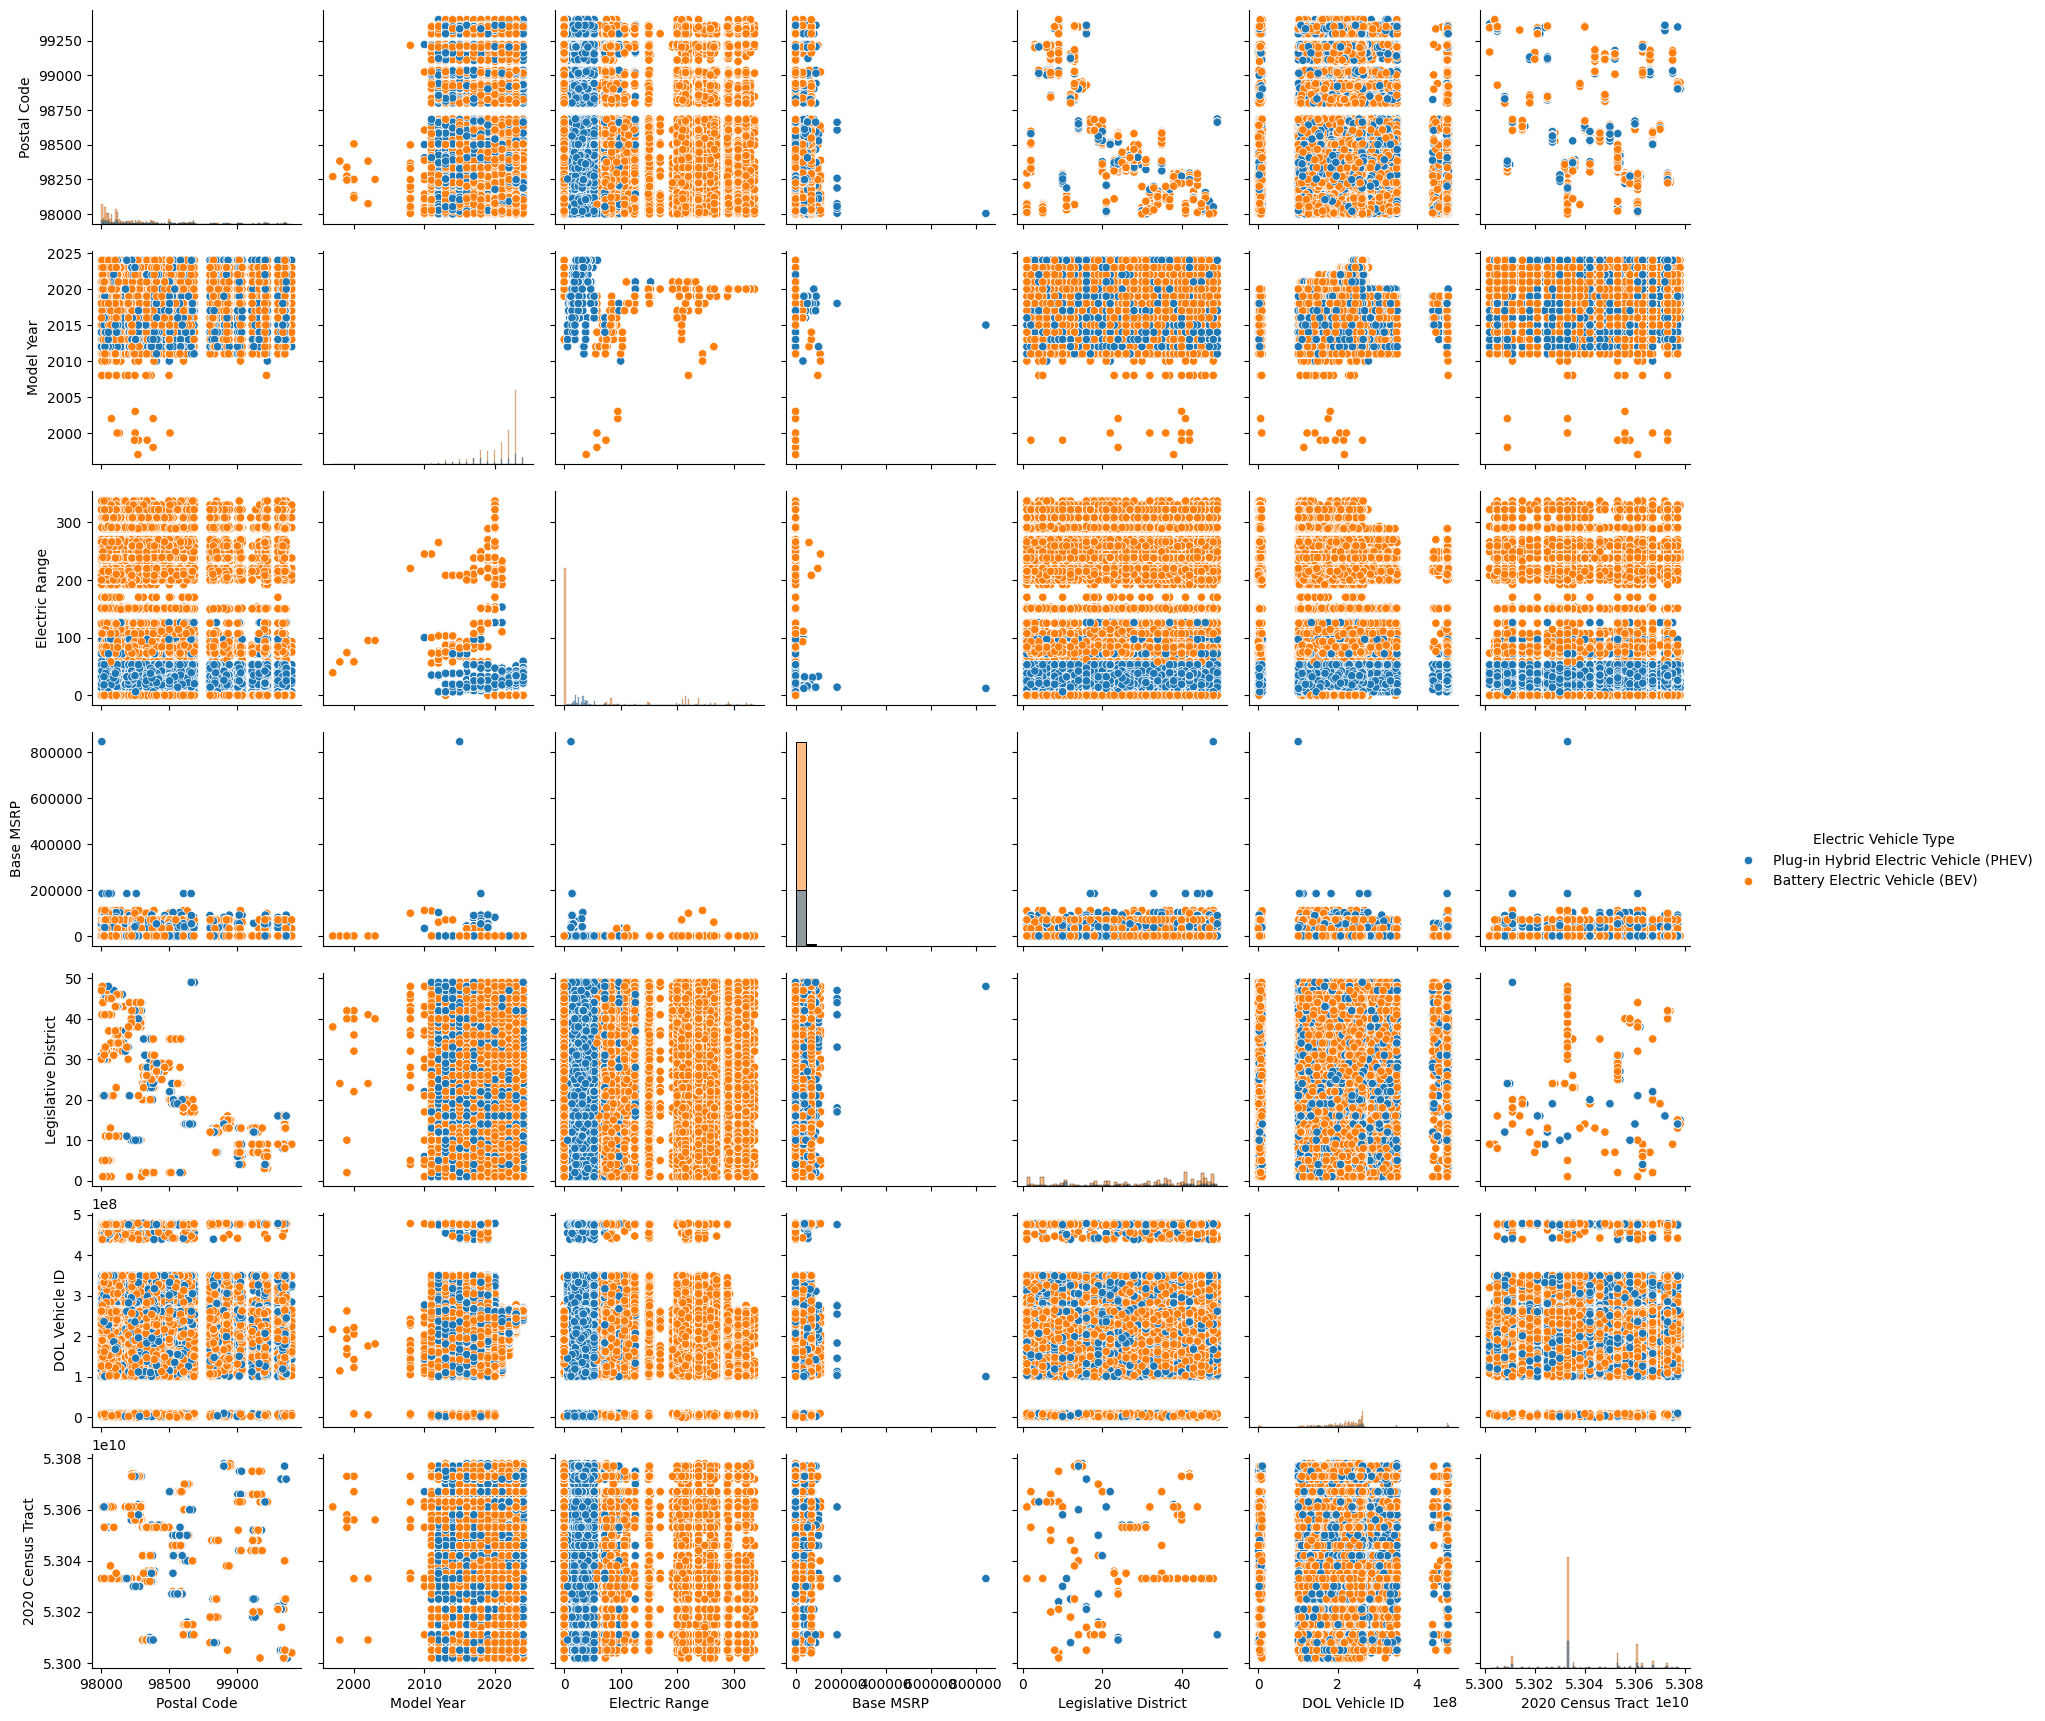

In [20]:
sns.pairplot(df, hue="Electric Vehicle Type", diag_kind="hist")


In [21]:
# Identify columns with non-numeric data
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric or drop them
for col in non_numeric_columns:
    try:
        # Attempt to convert non-numeric column to numeric
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # If conversion fails, drop the column
        df = df.drop(col, axis=1)

# Compute correlation matrix
corr_matrix = df.corr()


In [22]:
# Correlation of dataset
df.corr()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.056952,0.007190,-0.003874,-0.411162,-0.004350,0.022634
Model Year,-0.056952,1.000000,-0.481740,-0.229040,-0.015807,0.144480,-0.020496
Electric Range,0.007190,-0.481740,1.000000,0.108362,0.021149,-0.099526,-0.007128
Base MSRP,-0.003874,-0.229040,0.108362,1.000000,0.011784,-0.027502,-0.000871
Legislative District,-0.411162,-0.015807,0.021149,0.011784,1.000000,-0.010805,-0.102744
DOL Vehicle ID,-0.004350,0.144480,-0.099526,-0.027502,-0.010805,1.000000,-0.005781
2020 Census Tract,0.022634,-0.020496,-0.007128,-0.000871,-0.102744,-0.005781,1.000000


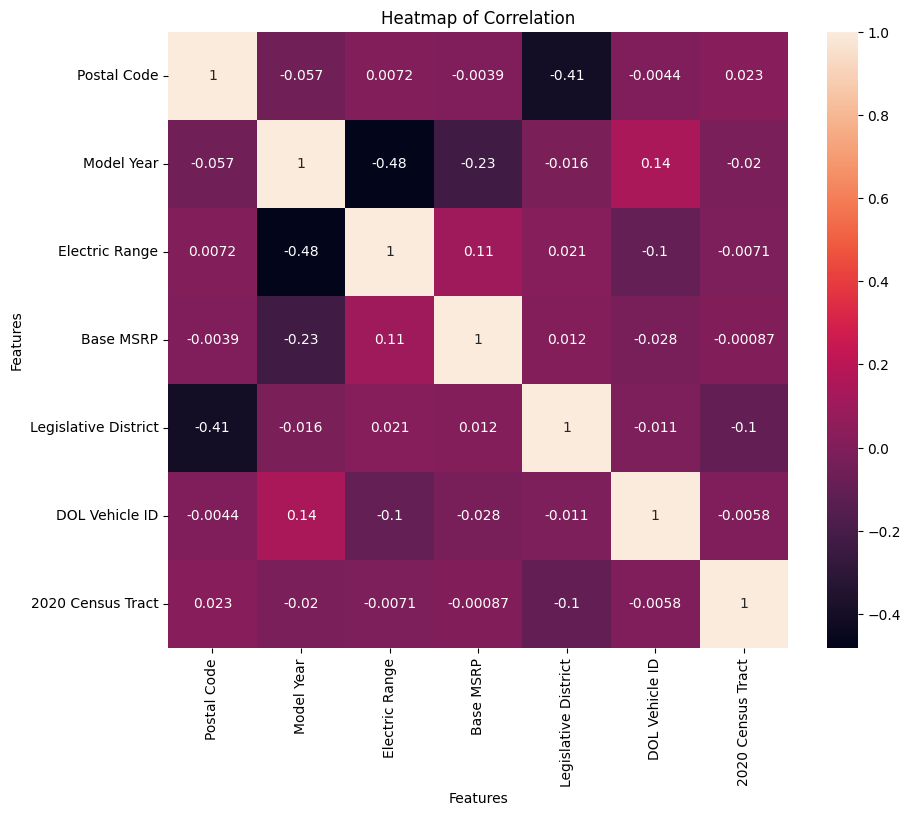

In [23]:
#1 Heat map of correlation of feattures and target variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Heatmap of Correlation')
plt.show()


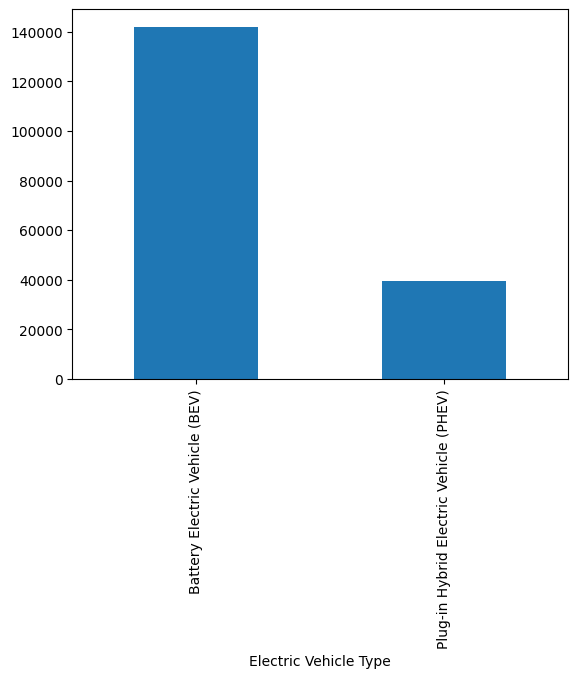

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Plot the distribution of electric vehicle types
df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.show()

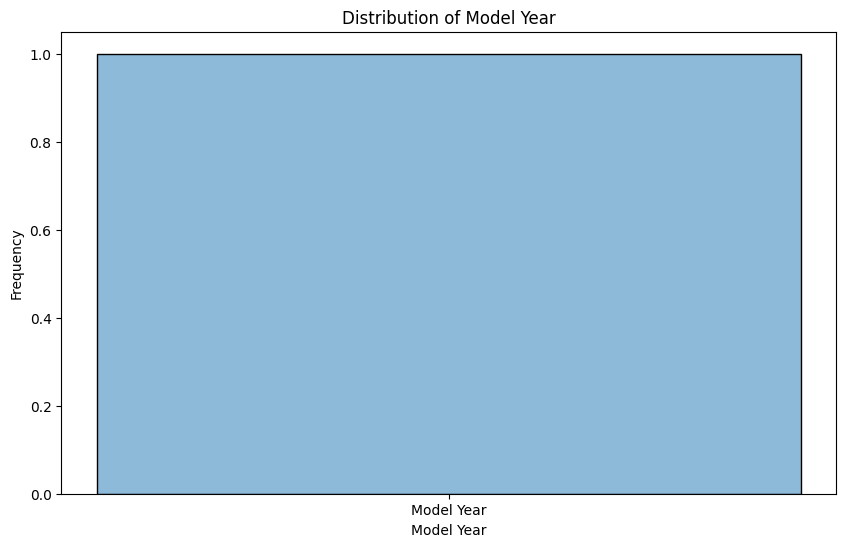

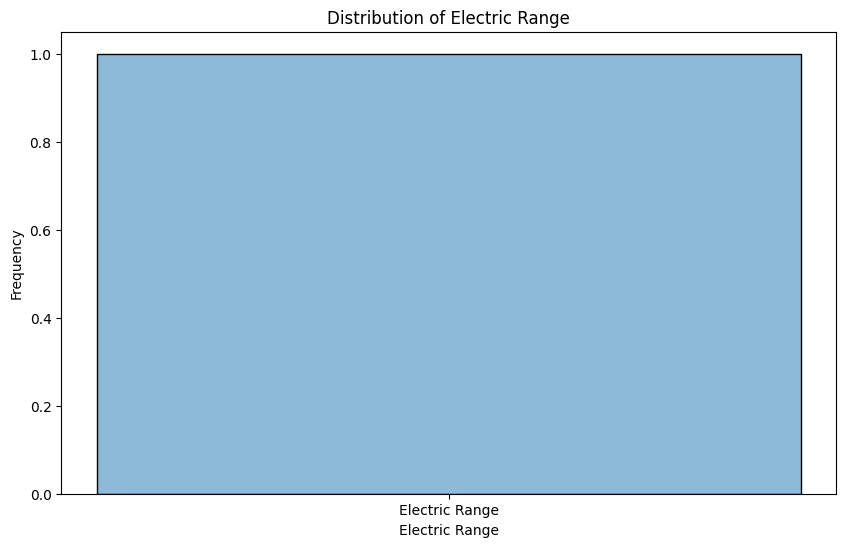

ValueError: Could not interpret value `Electric Vehicle Type` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [129]:



plt.figure(figsize=(10, 6))
sns.histplot(['Model Year'], bins=20, kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(['Electric Range'], bins=20, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

# Explore categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type')
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('Count of CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.show()

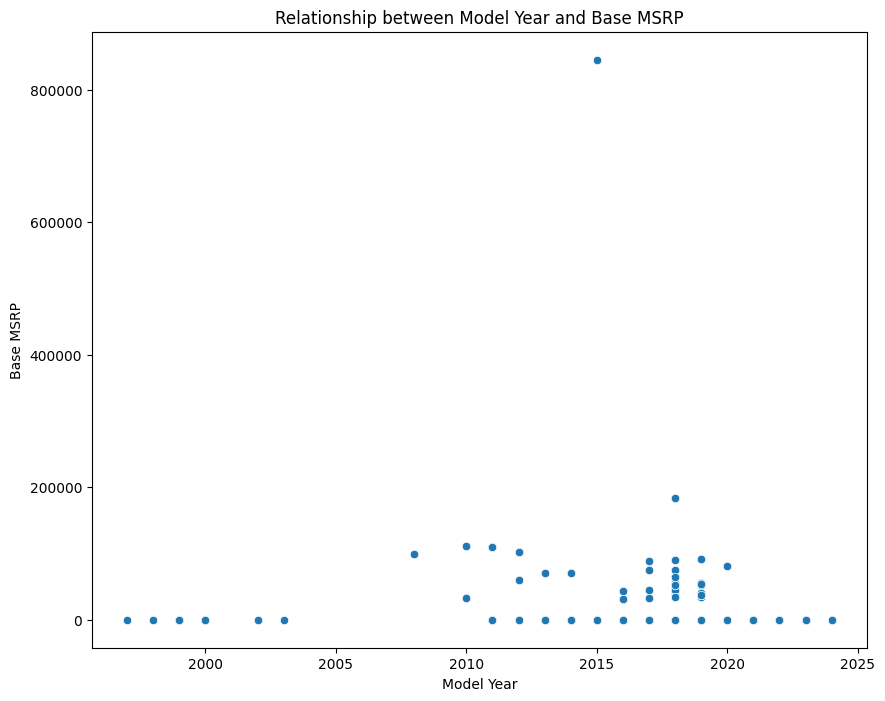

In [ ]:
# Scatter plot of 'Model Year' and 'Base MSRP'
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Model Year'], y=df['Base MSRP'])
plt.title('Relationship between Model Year and Base MSRP')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.show()

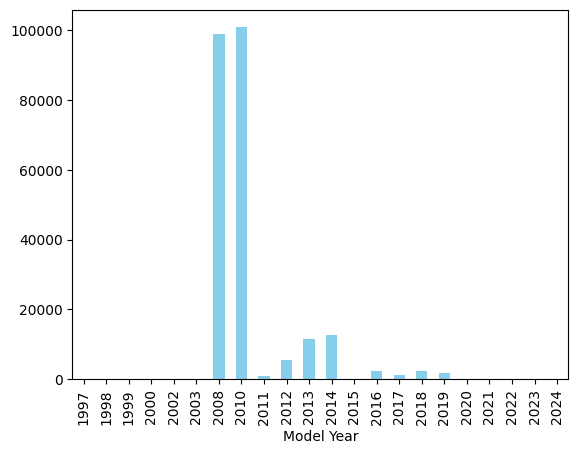

In [ ]:
# avg platelets count vs gender 
df.groupby('Model Year')['Base MSRP'].mean().plot(kind = 'bar' , color = 'skyblue')
plt.show()

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


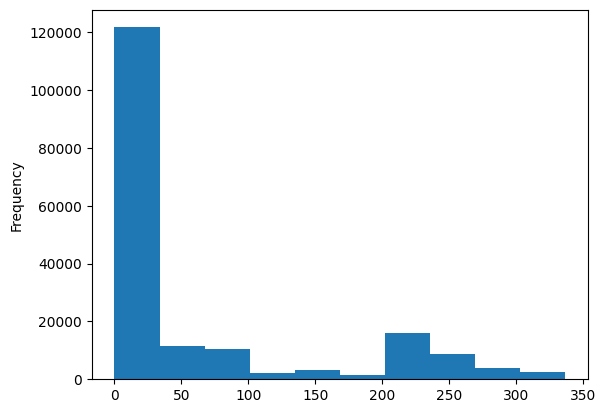

In [ ]:
df['Electric Range'].plot(kind='hist')
plt.show()


In [ ]:
#.
data_deid = df[df['Electric Vehicle Type'] == 0]
data_survived = df[df['Electric Vehicle Type'] == 1]
categorical_feature = df[['Electric Vehicle Type', 'County', 'City', 'State']]

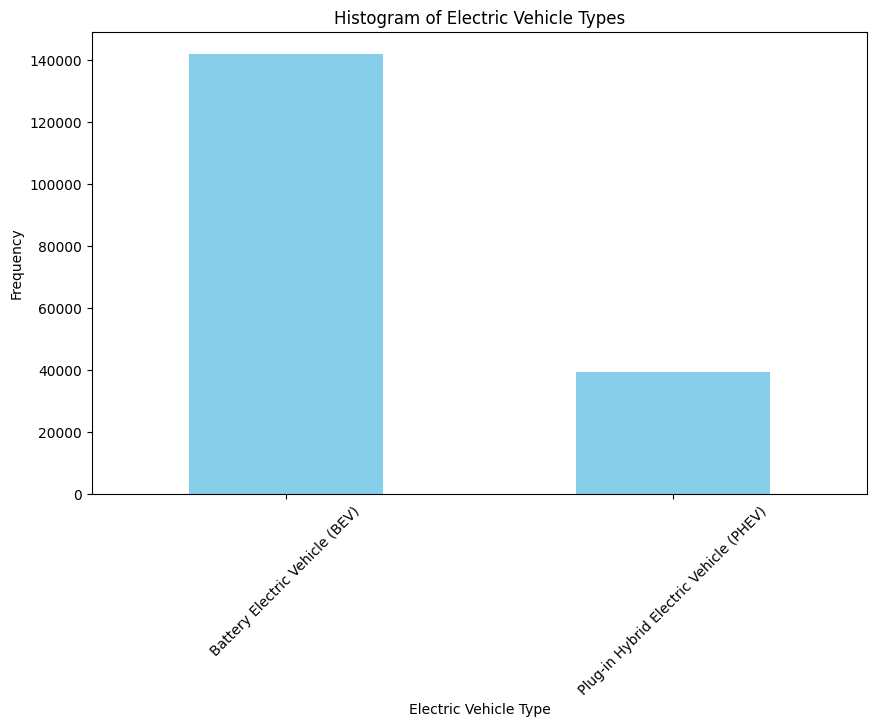

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each category in the 'Electric Vehicle Type' column
electric_vehicle_counts = df['Electric Vehicle Type'].value_counts()

# Plotting the histogram chart
plt.figure(figsize=(10, 6))
electric_vehicle_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
X=df.drop("Electric Vehicle Type",axis=1)
X

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [ ]:
y=df["Electric Vehicle Type"]
y

0         Plug-in Hybrid Electric Vehicle (PHEV)
1         Plug-in Hybrid Electric Vehicle (PHEV)
2                 Battery Electric Vehicle (BEV)
3         Plug-in Hybrid Electric Vehicle (PHEV)
4                 Battery Electric Vehicle (BEV)
                           ...                  
181453            Battery Electric Vehicle (BEV)
181454    Plug-in Hybrid Electric Vehicle (PHEV)
181455            Battery Electric Vehicle (BEV)
181456            Battery Electric Vehicle (BEV)
181457            Battery Electric Vehicle (BEV)
Name: Electric Vehicle Type, Length: 181458, dtype: object

In [ ]:
#. Build the model

X = df.drop(['Electric Vehicle Type'] , axis =1)
y = df['Electric Vehicle Type']
X


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify columns with non-numeric values
non_numeric_cols = X.select_dtypes(exclude=['int', 'float']).columns

# Apply one-hot encoding to categorical columns
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), non_numeric_cols)],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Initialize StandardScaler with with_mean=False
scaler = StandardScaler(with_mean=False)

# Scale the features
X_scaled = scaler.fit_transform(X_encoded)

# Display the scaled features
X_scaled

<181458x967 sparse matrix of type '<class 'numpy.float64'>'
	with 725832 stored elements in Compressed Sparse Row format>

In [131]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=34, shuffle =True)

#Splitted Data
print('X_scaled_train shape is ' , X_scaled_train.shape)
print('X_scaled_test shape is ' , X_scaled_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_scaled_train shape is  (145166, 967)
X_scaled_test shape is  (36292, 967)
y_train shape is  (145166,)
y_test shape is  (36292,)


In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify columns with non-numeric values
non_numeric_cols = X_train.select_dtypes(exclude=['int', 'float']).columns

# Apply one-hot encoding to categorical columns
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), non_numeric_cols)],
    remainder='passthrough'
)
X_train_encoded = column_transformer.fit_transform(X_train)

# Initialize StandardScaler
scaler = StandardScaler()



In [133]:
# Define the logistic regression model
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

In [135]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform the testing data using the fitted imputer
X_test_imputed = imputer.transform(X_test_scaled)

In [136]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)
best_params = grid_search.best_params_

# Train the model using the best hyperparameters
best_model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, **best_params)
best_model.fit(X_train_imputed, y_train)

# Make predictions and evaluate the model
y_pred = best_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)

In [137]:

# Check if the number of feature names matches the number of coefficients
if len(feature_names) != len(coefficients.squeeze()):
    print("Error: Number of feature names does not match the number of coefficients.")
else:
    # Create DataFrame with feature names and coefficients
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.squeeze()})
    
    # Filter out coefficients that are not zero
    selected_predictors = coefficients_df[coefficients_df['Coefficient'] != 0]
    
    # Print selected predictors
    print("Selected Predictors:")
    print(selected_predictors)

Error: Number of feature names does not match the number of coefficients.


In [140]:
# Separate the target variable (y) and features (X)
y = df['Electric Vehicle Type']
X = df.drop('Electric Vehicle Type', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=10000)  # Use 'saga' solver for large datasets

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'JTMFB3FVXM'

In [141]:
# Initialize a KNN classifier
knn = KNeighborsClassifier()

In [148]:

from sklearn.impute import SimpleImputer

# Initialize the imputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform the testing data using the fitted imputer
X_test_imputed = imputer.transform(X_test_scaled)


In [154]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform the testing data using the fitted imputer
X_test_imputed = imputer.transform(X_test_scaled)

In [156]:
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier()

In [158]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn.fit(X_train_scaled, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [159]:
# Predict on training set and test set
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)
# Evaluate accuracy on training set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print (f"KNN Training Accuracy: ({train_accuracy: .2f}")
print (f"KNN Test Accuracy: ({test_accuracy:.2f}")

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [160]:
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


Accuracy: 0.7822660641463683


Confusion Matrix is : 
 [[28390     0]
 [ 7902     0]]


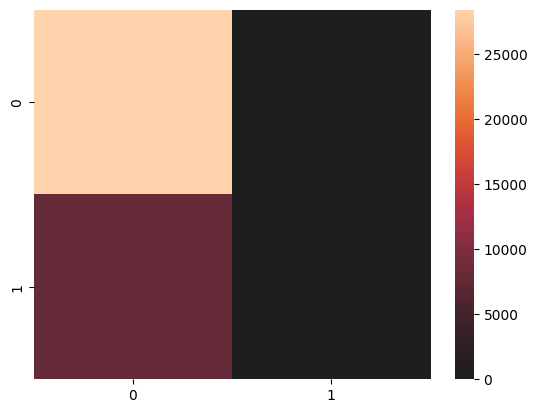

In [161]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [162]:
# the hyper-parameter K 
# Define search space for parameters
para_grid = {'n_neighbors': range(1, 31)}


# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, para_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_base.py", line 476, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '7FCTGAAA3P'

--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_base.py", line 476, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'WAUTPBFF4H'


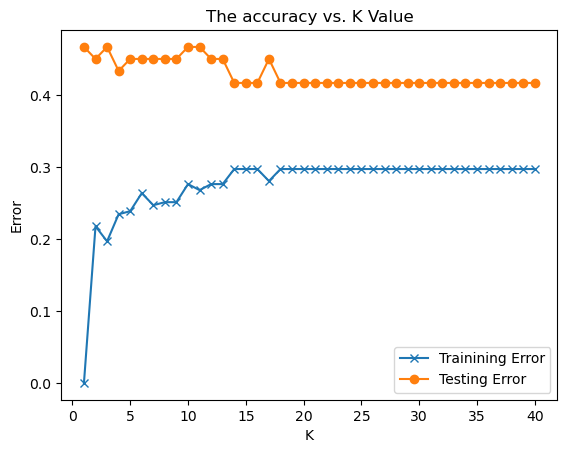

In [ ]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')

plt.title('The accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

As K increases, the model becomes less complex, leading to higher bias and lower variance.
Initially, as K increases, both training and testing errors decrease. This is because with a small value of K, the model can capture fine details in the training data, leading to overfitting. As K increases, the model generalizes better to unseen data, reducing overfitting.
However, after a certain point, increasing K too much leads to underfitting. The model becomes too simple to capture the underlying patterns in the data, causing both training and testing errors to increase.
The point at which the testing error starts increasing again (while the training error keeps decreasing) indicates the optimal value of K that balances bias and variance, leading to the best generalization performance on unseen data.